In [ ]:
#Import necessary packages
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image as pil_image
from IPython.display import Image as Image
from matplotlib.pyplot import imshow, imsave
 
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools
 
import keras
from keras.utils.np_utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [ ]:
Image_Width=224
Image_Height=224
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Upload data and unzip
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/Autism/data/archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
filenames = os.listdir("/content/AutismDataset/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(1)
    else:
        categories.append(0)

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
filenames = os.listdir("/content/AutismDataset/test")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(1)
    else:
        categories.append(0)

test_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
train_df.head()

,filename,category
0,Autistic.1026.jpg,1
1,Autistic.361.jpg,1
2,Autistic.102.jpg,1
3,Autistic.71.jpg,1
4,Non_Autistic.1158.jpg,0


In [ ]:
train_df.tail()

,filename,category
2535,Non_Autistic.811.jpg,0
2536,Non_Autistic.118.jpg,0
2537,Autistic.447.jpg,1
2538,Non_Autistic.1209.jpg,0
2539,Non_Autistic.1221.jpg,0


In [ ]:
test_df.tail()


,filename,category
295,Non_Autistic.124.jpg,0
296,Autistic.131.jpg,1
297,Autistic.49.jpg,1
298,Non_Autistic.77.jpg,0
299,Non_Autistic.118.jpg,0


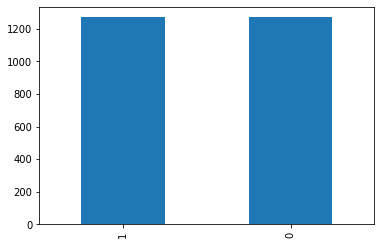

In [ ]:
train_df['category'].value_counts().plot.bar()

In [ ]:
train_df["category"] = train_df["category"].replace({0: 'non_autistic', 1: 'autistic'}) 

In [ ]:
test_df["category"] = test_df["category"].replace({0: 'non_autistic', 1: 'autistic'}) 

In [ ]:
num_classes = 2

In [ ]:
# Imports para manipulação e visualização de dados
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Imports para manipulação de imagens
import os 
import sklearn
from PIL import Image
from sklearn.model_selection import train_test_split

# Imports para cálculo de métricas e utilitários
import itertools
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Imports para Deep Learning
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical

#from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input

# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

%matplotlib inline

In [ ]:
image_size = 224
input_shape = (image_size, image_size, 3)

#Hyperparameters
epochs = 30
batch_size = 32

pre_trained_model = tf.keras.applications.InceptionV3(weights = 'imagenet',
                                              include_top = False,
                                               input_shape = input_shape
                                              )

pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [ ]:
# Adicionamos nossas camadas ao modelo_base

# Cria a sequência de camadas
add_model = Sequential()

# Adiciona primeiro o modelo base
add_model.add(pre_trained_model)

# Precisamos de uma camada global de Pooling
add_model.add(GlobalAveragePooling2D())

# Dropout para regularização e evitar overfitting
add_model.add(Dropout(0.5))

# Camada densa na camada final com ativação softmax para previsão das probabilidades das classes
add_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model = add_model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 21,804,833
Trainable params: 21,770,401
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import time
start = time.time()


In [ ]:
# Imports para manipulação e visualização de dados
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Imports para manipulação de imagens
import os 
import sklearn
from PIL import Image
from sklearn.model_selection import train_test_split

# Imports para cálculo de métricas e utilitários
import itertools
from sklearn.utils.multiclass import unique_labels
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Imports para Deep Learning
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical

#from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input

# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

%matplotlib inline

In [ ]:
#Import necessary packages
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image as pil_image
from IPython.display import Image as Image
from matplotlib.pyplot import imshow, imsave
 
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools
 
import keras
from keras.utils.np_utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow.keras,os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers , layers, applications

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
# Prepare Test and Train Data
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [ ]:
total_train 

2057

In [ ]:
# Training Generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/AutismDataset/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2057 validated image filenames belonging to 2 classes.


In [ ]:
validate_df.head()

,level_0,index,filename,category
0,749,2232,Non_Autistic.734.jpg,non_autistic
1,691,1029,Non_Autistic.1098.jpg,non_autistic
2,289,1867,Autistic.745.jpg,autistic
3,1831,2332,Autistic.909.jpg,autistic
4,224,1489,Autistic.942.jpg,autistic


In [ ]:
# Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/AutismDataset/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 229 validated image filenames belonging to 2 classes.


In [ ]:
# Validation Generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    "/content/AutismDataset/test/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 300 validated image filenames belonging to 2 classes.


In [ ]:

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size = 32

In [ ]:

%%time

#Fit Model
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/30
64/64 [==============================] - 54s 555ms/step - loss: 0.6798 - accuracy: 0.5926 - val_loss: 0.6439 - val_accuracy: 0.6250
Epoch 2/30
64/64 [==============================] - 36s 553ms/step - loss: 0.5137 - accuracy: 0.7427 - val_loss: 0.5851 - val_accuracy: 0.6920
Epoch 3/30
64/64 [==============================] - 36s 546ms/step - loss: 0.4367 - accuracy: 0.7921 - val_loss: 0.5276 - val_accuracy: 0.7009
Epoch 4/30
64/64 [==============================] - 31s 488ms/step - loss: 0.3961 - accuracy: 0.8222 - val_loss: 0.5942 - val_accuracy: 0.7500
Epoch 5/30
64/64 [==============================] - 33s 504ms/step - loss: 0.3650 - accuracy: 0.8375 - val_loss: 0.4937 - val_accuracy: 0.7411
Epoch 6/30
64/64 [==============================] - 32s 503ms/step - loss: 0.3037 - accuracy: 0.8681 - val_loss: 0.4851 - val_accuracy: 0.8036
Epoch 7/30
64/64 [==============================] - 31s 488ms/step - loss: 0.3004 - accuracy: 0.8681 - val_loss: 0.6032 - val_accuracy: 0.7545

In [ ]:
model.save("/content/drive/MyDrive/Autism/weights/GPU/inceptionv3/inceptionv3.h5")

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("valid: accuracy = %f  ;  loss = %f " % (accuracy, loss))

valid: accuracy = 0.790179  ;  loss = 1.049684 


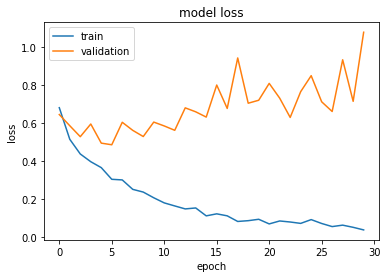

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

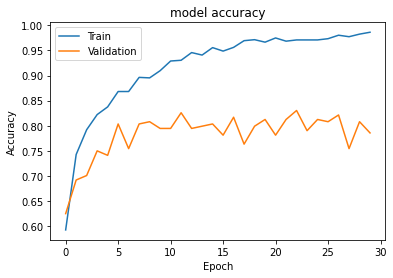

In [ ]:
# Plot da Acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.785714  ;  loss = 1.076621 
